In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [222]:
df = pd.read_csv(r'D:\Yuri\Projects\approved_and_not_buyout\approved_and_not_buyout.csv')
lastta = pd.read_csv(r'D:\Yuri\Projects\approved_and_not_buyout\lastta.csv')
total = pd.read_csv(r'D:\Yuri\Projects\approved_and_not_buyout\_total_USD_.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25136 entries, 0 to 25135
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_phone                25136 non-null  object 
 1   name_en                       25136 non-null  object 
 2   orders_count_buyout_is_false  25136 non-null  int64  
 3   orders_count_buyout_is_true   25136 non-null  int64  
 4   total_closed_orders           25136 non-null  int64  
 5   USD_total_closed_orders       25136 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.2+ MB


### Данные с 2022-01-01

In [34]:
df

,customer_phone,name_en,orders_count_buyout_is_false,orders_count_buyout_is_true,total_closed_orders,USD_total_closed_orders
0,(empty),Chile,3,45,48,2029.060633
1,(empty),Mexico,8,157,165,6980.846705
2,07041292485,Japan,2,1,3,212.880242
3,08060606689,Japan,2,0,2,98.539620
4,08081468141,Japan,2,0,2,158.596373
...,...,...,...,...,...,...
25131,undefined,France-Darix,81,471,552,9381.000767
25132,undefined,Italy-Darix,21,338,359,5685.657626
25133,undefined,Mexico,1010,4165,5175,150312.224663
25134,undefined,Spain-Darix,12,5,17,220.922611


In [32]:
total

,total_order_count,USD_total_order_count
0,1233597,82352530


In [62]:
group_by_phone_df = df.groupby('customer_phone', as_index=False).agg({'orders_count_buyout_is_false':sum, 'orders_count_buyout_is_true':sum, 'total_closed_orders': sum, 'USD_total_closed_orders': sum})

In [223]:
group_by_phone_df = group_by_phone_df.loc[1:25125]
group_by_phone_df

,customer_phone,orders_count_buyout_is_false,orders_count_buyout_is_true,total_closed_orders,USD_total_closed_orders
1,07041292485,2,1,3,212.880242
2,08060606689,2,0,2,98.539620
3,08081468141,2,0,2,158.596373
4,13175010358,2,0,2,154.485132
5,15598535956,2,0,2,193.412081
...,...,...,...,...,...
25121,94779584408,2,0,2,149.976226
25122,94779626816,2,0,2,95.955283
25123,94781615555,2,0,2,149.869322
25124,94783926421,2,0,2,83.330809


In [118]:
message = 'Orders in query/total orders is: {order}%, USD in query/total USD is: {usd}%'

In [88]:
group_by_phone_df['orders_count_buyout_is_false'].sum(), group_by_phone_df['orders_count_buyout_is_true'].sum(), 

(56364, 7902)

In [225]:
lastta = lastta.loc[2:404817]
lastta

,customer_phone,name_en,orders_count_buyout_is_false,orders_count_buyout_is_true,total_closed_orders,USD_total_closed_orders
2,00104858209,Colombia,1,0,1,35.742293
3,004421107797,Mexico,1,0,1,54.264956
4,005581424742,Mexico,1,0,1,76.579075
5,006391193794,Mexico,1,0,1,75.356799
6,006611174574,Mexico,1,0,1,54.027773
...,...,...,...,...,...,...
404813,987347281987347281,Peru,1,0,1,42.356056
404814,9875661716,Peru,1,0,1,41.580042
404815,987668535729497,Mexico,1,0,1,81.242101
404816,991600604,Mexico,1,0,1,75.582702


#### orders_count_buyout_is_false == 1

In [227]:
# % заказов, которые аппрувились, но не выкупались хотя бы 1 раз
message.format(order=round(lastta['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(lastta['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2))

'Orders in query/total orders is: 35.35%, USD in query/total USD is: 40.29%'

In [229]:
# % заказов, которые аппрувились, но не выкупались хотя бы 1 раз, при этом других выкупов не было
message.format(order=round(lastta[lastta['orders_count_buyout_is_true'] == 0]['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(lastta[lastta['orders_count_buyout_is_true'] == 0]['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2))

'Orders in query/total orders is: 31.52%, USD in query/total USD is: 31.69%'

In [228]:
# % заказов, которые аппрувились, но не выкупались хотя бы 1 раз, при этом были другие выкупы
message.format(order=round(lastta[lastta['orders_count_buyout_is_true'] != 0]['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(lastta[lastta['orders_count_buyout_is_true'] != 0]['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2)) 

'Orders in query/total orders is: 3.83%, USD in query/total USD is: 8.6%'

#### orders_count_buyout_is_false > 1

In [153]:
# % заказов, которые аппрувились, но не выкупались хотя бы 2 раза
message.format(order=round(group_by_phone_df['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(group_by_phone_df['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2))

'Orders in query/total orders is: 4.57%, USD in query/total USD is: 5.89%'

In [147]:
# % заказов, которые аппрувились, но не выкупались хотя бы 2 раза, при этом других выкупов не было
message.format(order=round(group_by_phone_df[group_by_phone_df['orders_count_buyout_is_true'] == 0]['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(group_by_phone_df[group_by_phone_df['orders_count_buyout_is_true'] == 0]['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2))

'Orders in query/total orders is: 3.45%, USD in query/total USD is: 3.8%'

In [148]:
# % заказов, которые аппрувились, но не выкупались хотя бы 2 раза, при этом были другие выкупы
message.format(order=round(group_by_phone_df[group_by_phone_df['orders_count_buyout_is_true'] != 0]['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(group_by_phone_df[group_by_phone_df['orders_count_buyout_is_true'] != 0]['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2)) 

'Orders in query/total orders is: 1.12%, USD in query/total USD is: 2.09%'

#### orders_count_buyout_is_false > 2

In [166]:
more_than_2 = group_by_phone_df[group_by_phone_df['orders_count_buyout_is_false'] > 2]

In [167]:
# % заказов, которые аппрувились, но не выкупались хотя бы 3 раза
message.format(order=round(more_than_2['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(more_than_2['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2))

'Orders in query/total orders is: 1.17%, USD in query/total USD is: 1.64%'

In [168]:
# % заказов, которые аппрувились, но не выкупались хотя бы 3 раза, при этом других выкупов не было
message.format(order=round(more_than_2[more_than_2['orders_count_buyout_is_true'] == 0]['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(more_than_2[more_than_2['orders_count_buyout_is_true'] == 0]['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2))

'Orders in query/total orders is: 0.77%, USD in query/total USD is: 0.94%'

In [169]:
# % заказов, которые аппрувились, но не выкупались хотя бы 3 раза, при этом были другие выкупы
message.format(order=round(more_than_2[more_than_2['orders_count_buyout_is_true'] != 0]['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(more_than_2[more_than_2['orders_count_buyout_is_true'] != 0]['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2)) 

'Orders in query/total orders is: 0.4%, USD in query/total USD is: 0.7%'

#### orders_count_buyout_is_false > 3

In [173]:
more_than_3 = group_by_phone_df[group_by_phone_df['orders_count_buyout_is_false'] > 3]

In [174]:
# % заказов, которые аппрувились, но не выкупались хотя бы 4 раза
message.format(order=round(more_than_3['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(more_than_3['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2))

'Orders in query/total orders is: 0.43%, USD in query/total USD is: 0.61%'

In [175]:
# % заказов, которые аппрувились, но не выкупались хотя бы 4 раза, при этом других выкупов не было
message.format(order=round(more_than_3[more_than_3['orders_count_buyout_is_true'] == 0]['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(more_than_3[more_than_3['orders_count_buyout_is_true'] == 0]['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2))

'Orders in query/total orders is: 0.25%, USD in query/total USD is: 0.29%'

In [176]:
# % заказов, которые аппрувились, но не выкупались хотя бы 4 раза, при этом были другие выкупы
message.format(order=round(more_than_3[more_than_3['orders_count_buyout_is_true'] != 0]['orders_count_buyout_is_false'].sum()/total.iloc[0, 0]*100, 2), 
               usd=round(more_than_3[more_than_3['orders_count_buyout_is_true'] != 0]['USD_total_closed_orders'].sum()/total.iloc[0, 1]*100, 2)) 

'Orders in query/total orders is: 0.18%, USD in query/total USD is: 0.33%'

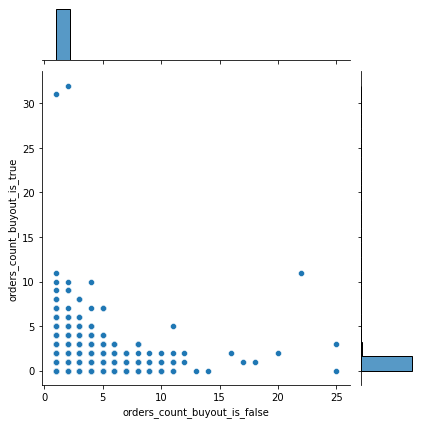

In [231]:
sns.jointplot(x=lastta.orders_count_buyout_is_false, y=lastta.orders_count_buyout_is_true)

In [89]:
group_by_phone_df[group_by_phone_df['orders_count_buyout_is_false'] > 2]

,customer_phone,orders_count_buyout_is_false,orders_count_buyout_is_true,total_closed_orders,USD_total_closed_orders
6,16126368095,3,0,3,267.306603
18,18094908862,3,0,3,209.869058
48,18293427196,3,0,3,241.085927
56,18294782366,3,0,3,200.041219
72,18298719546,3,0,3,194.360595
...,...,...,...,...,...
25088,94771008387,3,0,3,128.187851
25093,94772829125,3,0,3,166.563471
25101,94774326015,3,0,3,147.564680
25104,94774833878,3,4,7,485.848212


In [170]:
group_by_phone_df['orders_count_buyout_is_false'].unique()

array([ 2,  3,  4,  5,  6,  7,  8, 10,  9, 11, 12, 20, 16, 22, 13, 14, 17,
       25, 18], dtype=int64)

In [171]:
group_by_phone_df['orders_count_buyout_is_true'].unique()

array([ 1,  0,  3,  2,  8,  4,  5, 10,  6, 32,  7,  9, 11], dtype=int64)

In [210]:
group_by_phone_df['total_closed_orders'].sum()

64266